<a href="https://colab.research.google.com/github/TheEvergreenStateCollege/week-2-hunter-a1/blob/main/Cost_of_Living_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Cost_of_living_index.csv')

In [3]:
data.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"Hamilton, Bermuda",137.56,103.03,121.21,126.56,151.77,114.19
1,2,"Zurich, Switzerland",128.65,62.62,97.39,127.35,127.14,142.39
2,3,"Basel, Switzerland",126.89,46.14,88.66,120.44,129.10,141.48
3,4,"Lausanne, Switzerland",119.62,50.35,86.83,116.35,122.83,132.58
4,5,"Bern, Switzerland",118.42,39.22,80.93,114.54,114.86,115.48


In [4]:
data.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,268.500000,57.187575,25.209851,42.050485,49.758209,54.684851,89.492668
std,154.874142,19.984921,16.453828,17.457656,19.320901,25.092353,37.038404
min,1.000000,19.260000,3.430000,12.360000,18.010000,11.930000,2.240000
25%,134.750000,39.370000,11.687500,26.647500,31.497500,31.550000,56.792500
50%,268.500000,61.970000,23.095000,44.450000,51.570000,59.405000,94.105000
75%,402.250000,70.865000,33.440000,53.095000,62.757500,72.342500,119.500000
max,536.000000,137.560000,106.490000,121.210000,127.350000,151.770000,186.000000


In [5]:
data.dtypes

Rank                                int64
City                               object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

In [6]:
data.value_counts()

Rank  City                            Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  Local Purchasing Power Index
1     Hamilton, Bermuda               137.56                103.03      121.21                          126.56           151.77                  114.19                          1
353   Kaunas, Lithuania               45.88                 11.73       29.71                           34.52            41.31                   61.43                           1
367   Brasilia, Brazil                44.02                 13.90       29.76                           34.36            42.56                   63.24                           1
366   Rio de Janeiro, Brazil          44.12                 16.19       30.89                           29.67            40.01                   36.57                           1
365   Sao Paulo, Brazil               44.16                 16.59       31.11                           32.25 

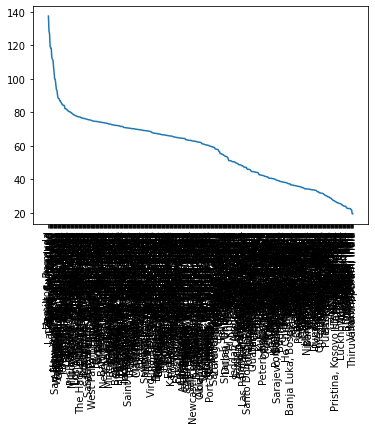

In [9]:
plt.plot(data['City'],data['Cost of Living Index'])
plt.xticks(rotation=90)
plt.show()

In [18]:
print(data['City'][data['Cost of Living Index'].idxmax()], data['Cost of Living Index'][data['Cost of Living Index'].idxmax()])
# print(data['Cost of Living Index'].idxmax())

Hamilton, Bermuda 137.56


In [19]:
print(data['City'][data['Cost of Living Index'].idxmin()], data['Cost of Living Index'][data['Cost of Living Index'].idxmin()])

Thiruvananthapuram, India 19.26


# Comparison of Cost of Living Index to Rent Index

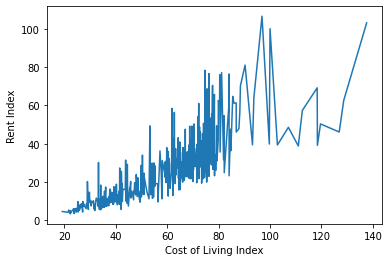

In [21]:
plt.plot(data['Cost of Living Index'], data['Rent Index'])
plt.xlabel("Cost of Living Index")
plt.ylabel("Rent Index")
plt.show()

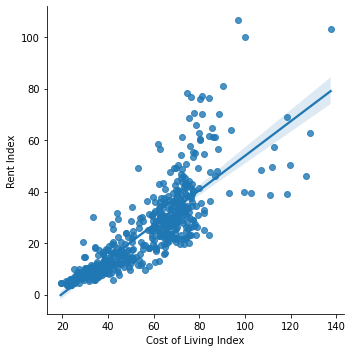

In [22]:
sns.lmplot(data = data, x = "Cost of Living Index", y = "Rent Index");

In [23]:
x_bar = np.mean(data['Cost of Living Index'])
y_bar = np.mean(data['Rent Index'])
std_x = np.std(data['Cost of Living Index'])
std_y = np.std(data['Rent Index'])
r = np.corrcoef(data['Cost of Living Index'], data['Rent Index'])
r = r[0][1]
r

0.8133299239926407

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(X = data[['Cost of Living Index']], y= data['Rent Index'])

LinearRegression()

In [26]:
model.coef_

array([0.66962442])

In [27]:
model.intercept_

-13.084345593123388

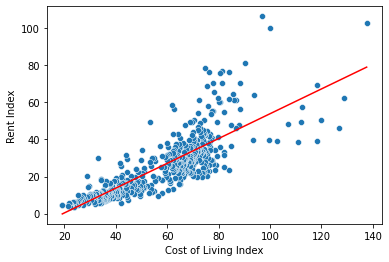

In [31]:
predicted_rent = model.predict(X=data[['Cost of Living Index']])
sns.scatterplot(x='Cost of Living Index', y='Rent Index', data=data)
plt.plot(data["Cost of Living Index"],  predicted_rent, color = 'r');

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Rent Index
Feature names seen at fit time, yet now missing:
- Cost of Living Index

  warnings.warn(message, FutureWarning)


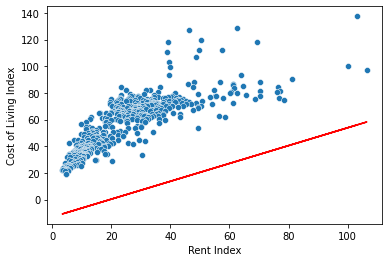

In [32]:
predicted_total = model.predict(X=data[['Rent Index']])
sns.scatterplot(x='Rent Index', y='Cost of Living Index', data=data)
plt.plot(data["Rent Index"],  predicted_total, color = 'r');

Comparison of Cost of Living Index to Groceries Index

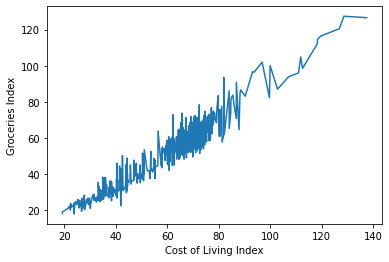

In [29]:
plt.plot(data['Cost of Living Index'], data['Groceries Index'])
plt.xlabel("Cost of Living Index")
plt.ylabel("Groceries Index")
plt.show()

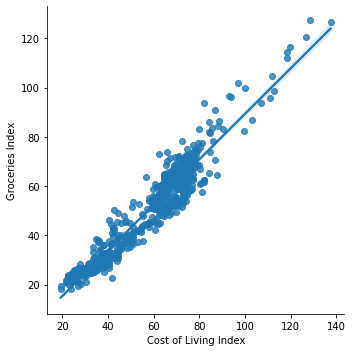

In [30]:
sns.lmplot(data = data, x = "Cost of Living Index", y = "Groceries Index");